In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\vorar'

In [3]:
cd E:\Data Science\ML_PROJECTS

E:\Data Science\ML_PROJECTS


In [4]:
data=pd.read_csv("ML Project - Linear Regression Insurance Prediction 16955515670.csv")

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data[["children"]]=data[["children"]].fillna(0)

In [7]:
data[["bmi"]]=data[["bmi"]].fillna(data[["bmi"]].mean())

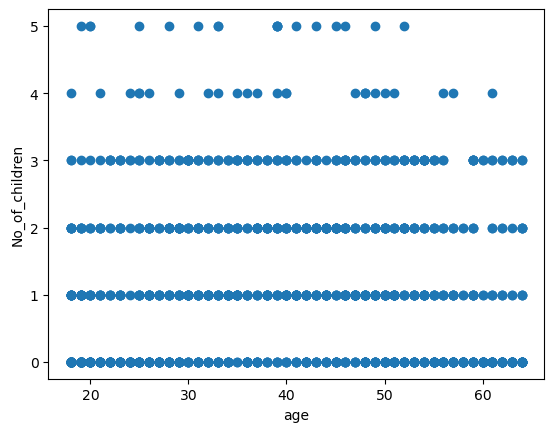

In [8]:
plt.scatter('age','children', data=data)
plt.xlabel("age")
plt.ylabel("No_of_children")
plt.show()

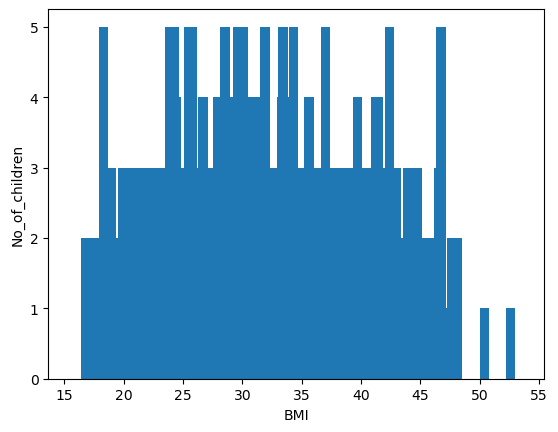

In [9]:
plt.bar("bmi","children", data=data)
plt.xlabel("BMI")
plt.ylabel("No_of_children")
plt.show()

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data=pd.get_dummies(data,drop_first=True)
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [12]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_ss=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
df_ss.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
x=df_ss.drop("charges", axis=1)
y=df_ss["charges"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [16]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
428,-1.296362,-2.271753,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
226,-0.797954,1.213372,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
867,1.266881,2.138583,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
397,-1.296362,0.058499,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
300,-0.228344,-0.510736,1.580926,0.989591,-0.507463,-0.566418,-0.611324,-0.566418


In [17]:

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=model.predict(x_test)


C:\Users\vorar\AppData\Local\Temp\ipykernel_6872\3603801925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50);
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


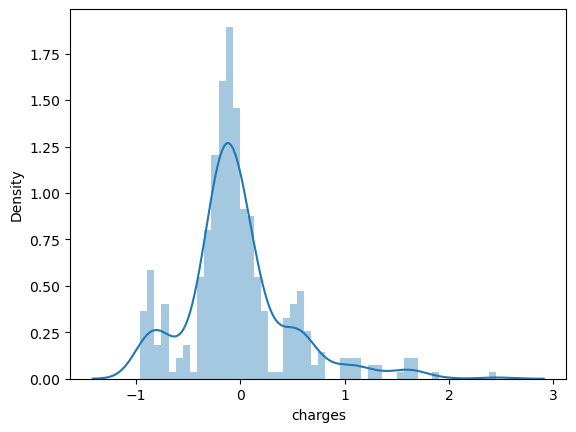

In [19]:
sns.distplot((y_test-y_pred),bins=50);

In [20]:
model.coef_

array([ 0.30910786,  0.17217267,  0.06114196, -0.01149336,  0.81065473,
        0.00901133, -0.02763142, -0.02239348])

In [21]:
model.intercept_

0.008144479781367762

In [22]:
model.score(x_train,y_train)

0.7618780003618578

In [23]:
model.score(x_test,y_test)

0.7166124432331722

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [31]:
mean_absolute_error(y_test,y_pred)

0.3491514526475077

In [32]:
mean_squared_error(y_test,y_pred)

0.251121967795223

In [33]:
print(r2_score(y_test,y_pred))


0.7166124432331722
